<div style="
    font-variant: small-caps;
    font-weight: normal;
    font-size: 30px;
    text-align: center;
    padding: 15px;
    margin: 10px;">ASI assessed Exercise</div>
    
<div style="display: inline-block; font-family: 'Lato', sans-serif; font-size: 12px; font-weight: bold; line-height: 12px; letter-spacing: 1px; padding: 10px 15px 8px;">31/05/2017</div>
    
<div style="
    float:right;
    font-size: 12px;
    line-height: 12px;
    padding: 10px 15px 8px;">Alberto IBARRONDO & Jonas Wacker</div>

# Summary
Analysis of MNIST and CIFAR datasets using Advanced Statistical Inference models and algorithms

# 1. Import Datasets

### 1.1 MNIST

In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mnist_X_train, mnist_y_train = load_mnist(dataset='training')
mnist_X_test,  mnist_y_test  = load_mnist(dataset='testing')

### 1.2 CIFAR 10

In [5]:
all_images, all_labels= load_cifar10('cifar-10-python.tar.gz')
print(type(all_images))
print(all_images.keys())
print(all_labels.keys())

<class 'dict'>
dict_keys(['data_batch_4', 'data_batch_5', 'data_batch_1', 'test_batch', 'data_batch_3', 'data_batch_2'])
dict_keys(['data_batch_4', 'data_batch_5', 'data_batch_1', 'test_batch', 'data_batch_3', 'data_batch_2'])


In [6]:
cifar_X_train = np.concatenate([all_images['data_batch_1'], all_images['data_batch_1'], 
                             all_images['data_batch_3'], all_images['data_batch_4'],
                             all_images['data_batch_5']])
cifar_y_train = np.concatenate([all_labels['data_batch_1'], all_labels['data_batch_1'], 
                             all_labels['data_batch_3'], all_labels['data_batch_4'],
                             all_labels['data_batch_5']])
cifar_X_test = all_images['test_batch']
cifar_y_test = all_labels['test_batch']

# 2. Descriptive Analytics

## 2.1 MNIST

### 2.1.1 Description of MNIST

In [5]:
# Descriptive analytics over MNIST
print('Length of Training Set: %d'%len(mnist_X_train))
print('Length of Test Set: %d'%len(mnist_X_test))
print('Image sizes: [%d x %d]'%(mnist_X_test.shape[1:]))

Length of Training Set: 60000
Length of Test Set: 10000
Image sizes: [28 x 28]


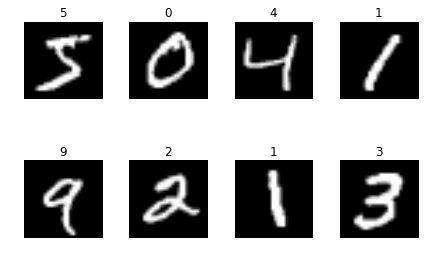

In [6]:
# Visualize MNIST examples
ROW = 2; COLUMN = 4

for i in range(ROW * COLUMN):
    image = mnist_X_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.axis('off')
    plt.title(mnist_y_train[i])
    plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

## 2.2 Distribution of labels in MNIST

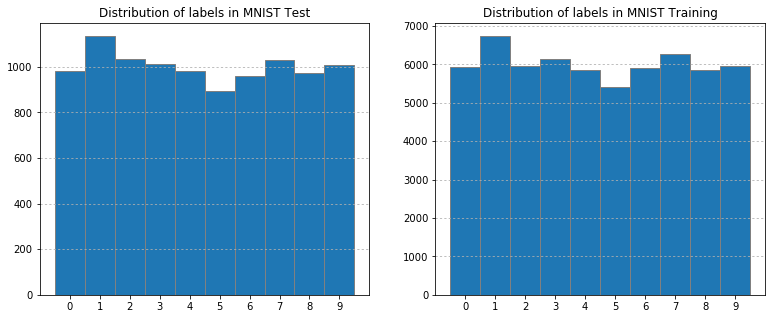

In [59]:
# Distribution of labels in MNIST
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(mnist_y_test, edgecolor='gray', align='mid', bins=np.arange(0,11)-0.5 )
ax[0].set_xticks((np.arange(0,10)))
ax[0].grid(axis='y', linestyle=':')
ax[0].set_title("Distribution of labels in MNIST Test")

ax[1].hist(mnist_y_train, edgecolor='gray', align='mid', bins=np.arange(0,11)-0.5 )
ax[1].set_xticks((np.arange(0,10)))
ax[1].grid(axis='y', linestyle=':')
ax[1].set_title("Distribution of labels in MNIST Training")
plt.show()

<div class="alert alert-info">
<h3>Question 2 - MNIST</h3>
The mnist dataset comprises 50000 training images and 10000 test images, each representing a single digit that is already correctly labelled.
Each input image is represented by an array of 784 8-bit integers (values range from 0 - black to 255 white). This array can be reshaped such that it leads to a 28x28 b/w image.<br /><br />

The labels are almost evenly distributed in the training as well as the test set.<br /><br />
This is a good thing because it means that we have more or less the same amount of training data for each digit and we can hope that the model will learn the recognition of each of them equally well. Having an even distribution of test labels is also a good thing because this will lead to comparable test results (precision/recall) among the labels.
</div>

## 2.2 CIFAR10

### 2.2.1 Description of CIFAR

In [7]:
# Sizes of CIFAR
print("Number of Training batches: 5")
print("Batch sizes: %d"% cifar_X_train.shape[0])
print("Image sizes: %d px with %d RGB colours each"%cifar_X_train.shape[1:])

Number of Training batches: 5
Batch sizes: 50000
Image sizes: 1024 px with 3 RGB colours each


In [8]:
# Example of a CIFAR data object
cifar_X_train[0]
cifar_X_test.shape

(10000, 1024, 3)

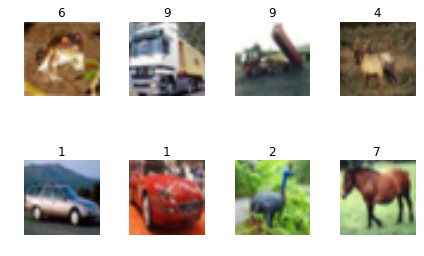

In [9]:
# Plot some example images
for i in range(ROW * COLUMN):
    image = cifar_X_train[i].reshape(32, 32, 3)
    plt.subplot(ROW, COLUMN, i+1)
    plt.axis('off')
    plt.title(cifar_y_train[i])
    plt.imshow(image)

plt.tight_layout()
plt.show()

## 2.2 Distribution of labels in CIFAR

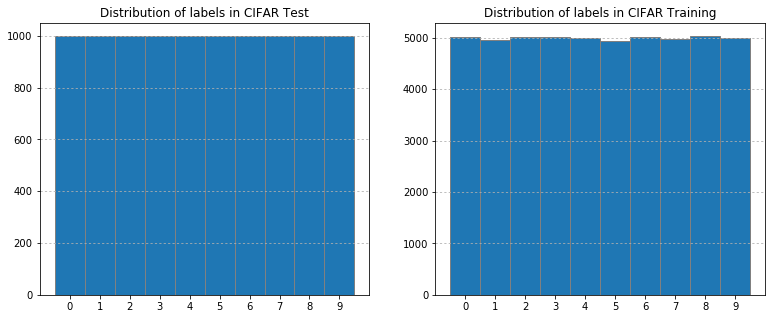

In [116]:
# Distribution of labels in MNIST
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(cifar_y_test, edgecolor='gray', align='mid', bins=np.arange(0,11)-0.5 )
ax[0].set_xticks((np.arange(0,10)))
ax[0].grid(axis='y', linestyle=':')
ax[0].set_title("Distribution of labels in CIFAR Test")

ax[1].hist(cifar_y_train, edgecolor='gray', align='mid', bins=np.arange(0,11)-0.5 )
ax[1].set_xticks((np.arange(0,10)))
ax[1].grid(axis='y', linestyle=':')
ax[1].set_title("Distribution of labels in CIFAR Training")
plt.show()

<div class="alert alert-info">
<h3>Question 2 - CIFAR10</h3>
The CIFAR10 dataset comprises 50000 training images (divided in 5 batches) and 10000 test images, each representing an object in a coloured image that is already correctly labelled.
Each input image is represented by an array of 1024 RGB values (3x8-bit integers, values range from 0 - 255). This array can be reshaped such that it leads to a 32x32 colour image.<br /><br />
Here again, the labels are almost evenly distributed in the training set. In the test set they are exactly evenly distributed.<br />
This is a good thing because it means that we have more or less the same amount of training data for each digit and we can hope that the model will learn the recognition of each of them equally well. Having an even distribution of test labels is also a good thing because this will lead to comparable test results (precision/recall) among the labels.<br /><br />
The training batches are not split by different kinds of objects but are simply representative partitions of the entire training data. Therefore, it is possible to train models on a single batch of the entire dataset if computational resources are limited.
</div>

## 2.2 Distribution of labels in MNIST

# 4. Linear Regression

### a) Implementation of Bayesian Linear Regression

In [7]:
import numpy as np

In [54]:
# Converts the input features into a format that is regressable.
def preprocess_inputs(features, noise_strength=0):
    N = len(features)
    
    # convert training data to feature vectors
    reg_features = np.array([feature.flatten() for feature in features], dtype='float')
    D = len(reg_features[0])
    
    # add gaussian noise to make (X'X) invertible
    # otherwise problematic because images can be very sparse
    reg_features += np.random.randn(N, D) * noise_strength
    
    # augment the feature matrix with bias terms
    reg_features = np.hstack((np.array([np.ones(N)]).T, reg_features))
    
    return reg_features

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Converts target labels into one-hot vectors.
# This is needed since our target labels are categorical (not continuous).
def preprocess_labels(labels):
    enc = OneHotEncoder()
    converted_labels = np.array(labels).reshape(-1, 1)
    oh_labels = enc.fit_transform(converted_labels).toarray()
    
    return oh_labels

In [59]:
# Returns the MLE-estimates for the regression weights as well as for the noise variance.
def obtain_mle_estimates(features, labels):
    N = len(features)
    X_t_X = np.dot(features.T, features)
    # W_hat is a matrix (num_features X num_distinct_labels) if labels are vectors
    W_hat = np.linalg.inv(X_t_X).dot(features.T).dot(labels)
    # We now have an estimate for the noise variance for each target label
    ss_hat = 1 / N * np.linalg.norm(labels - np.dot(features, W_hat), axis=0)**2
    
    return W_hat, ss_hat

In [60]:
# Returns the parameters (mu, sigma) for the posterior distribution of W.
def obtain_bayesian_posterior(features, labels, ss):
    dim_labels = labels.shape[1]
    D = features.shape[1]
    X_t_X = np.dot(features.T, features)
    
    ### define a prior on W:
    # We set the prior for each w vector to be standard normally distributed.
    # The impact of the prior will diminish the more training data we have.
    # Since we have 60,000 training samples, setting the prior arbitrarily is fine.
    # mu_0 becomes a matrix (one weight vector for each target label)
    mu_0 = np.zeros((D, dim_labels))
    
    # sigma_0 now becomes a 3-dimensional tensor
    # we simply repeat the eye matrix 10 times
    sigma_0_ind = np.eye(D)
    sigma_0 = np.repeat(sigma_0_ind[:, :, np.newaxis], dim_labels, axis=2)
    
    ### compute the posterior for W:
    # sigma_w now becomes a tensor as well
    sigma_w = np.ndarray(sigma_0.shape)

    for idx in range(dim_labels):
        sigma_w[:,:,idx] = np.linalg.inv(1/ss[idx] * X_t_X + np.linalg.inv(sigma_0[:,:,idx]))
    
    # mu_w now becomes a matrix
    mu_w = np.ndarray(mu_0.shape)
    
    for idx in range(dim_labels):
        mu_w[:, idx] = sigma_w[:,:,idx] \
            .dot(1/ss[idx] * features.T.dot(labels[:, idx]) \
            + np.linalg.inv(sigma_0[:,:,idx]).dot(mu_0[:, idx]))
            
    return mu_w, sigma_w

### b) Applying Bayesian Linear Regression to the training data

### Preprocessing

In [12]:
# convert training data to feature vectors
reg_features_mnist = preprocess_inputs(mnist_X_train, noise_strength=0.01)
reg_features_cifar = preprocess_inputs(cifar_X_train)

In [13]:
# convert test data to feature vectors (no noise needed here, no inversion)
reg_features_mnist_test = preprocess_inputs(mnist_X_test)
reg_features_cifar_test = preprocess_inputs(cifar_X_test)

In [14]:
print(reg_features_mnist.shape)
print(reg_features_cifar.shape)

(60000, 785)
(50000, 3073)


In [15]:
training_labels_mnist = preprocess_labels(mnist_y_train)
training_labels_cifar = preprocess_labels(cifar_y_train)
print(training_labels_mnist.shape)
print(training_labels_cifar.shape)

(60000, 10)
(50000, 10)


### Compute MLEs in order to get estimate for noise variance

In [16]:
W_hat_mnist, ss_hat_mnist = obtain_mle_estimates(reg_features_mnist, training_labels_mnist)
print(W_hat_mnist.shape)
print(ss_hat_mnist)

(785, 10)
[ 0.02533681  0.03002328  0.03695894  0.04349582  0.03989839  0.04581955
  0.02628293  0.03390124  0.04825394  0.04956342]


In [17]:
W_hat_cifar, ss_hat_cifar = obtain_mle_estimates(reg_features_cifar, training_labels_cifar)
print(W_hat_cifar.shape)
print(ss_hat_cifar)

(3073, 10)
[ 0.069872    0.06467464  0.07691291  0.07767213  0.07467782  0.07467821
  0.06904454  0.06897165  0.06838163  0.06617908]


In [19]:
predictions_mnist = np.dot(reg_features_mnist_test, W_hat_mnist)
predictions_cifar = np.dot(reg_features_cifar_test, W_hat_cifar)
print(predictions_mnist.shape)

(10000, 10)


In [20]:
predictions_mnist = np.argmax(predictions_mnist, axis=1)
predictions_cifar = np.argmax(predictions_cifar, axis=1)

In [21]:
print('MNIST accuracy using MLE estimate:', np.sum(predictions_mnist == mnist_y_test) / len(mnist_y_test))
print('CIFAR accuracy using MLE estimate:', np.sum(predictions_cifar == cifar_y_test) / len(cifar_y_test))

MNIST accuracy using MLE estimate: 0.8604
CIFAR accuracy using MLE estimate: 0.3574


### Compute the posterior parameters

In [26]:
mu_w_mnist, sigma_w_mnist = obtain_bayesian_posterior(reg_features_mnist, training_labels_mnist, ss_hat_mnist)

In [27]:
mu_w_cifar, sigma_w_cifar = obtain_bayesian_posterior(reg_features_cifar, training_labels_cifar, ss_hat_cifar)

### c) Compute average predictions on test data

In [28]:
expected_values_mnist = np.dot(reg_features_mnist_test, mu_w_mnist)
print(expected_values_mnist.shape)
expected_values_cifar = np.dot(reg_features_cifar_test, mu_w_cifar)
print(expected_values_cifar.shape)

(10000, 10)
(10000, 10)


In [29]:
expected_values_num_mnist = np.argmax(expected_values_mnist, axis=1)
print(expected_values_num_mnist.shape)
expected_values_num_cifar = np.argmax(expected_values_cifar, axis=1)
print(expected_values_num_mnist.shape)

(10000,)
(10000,)


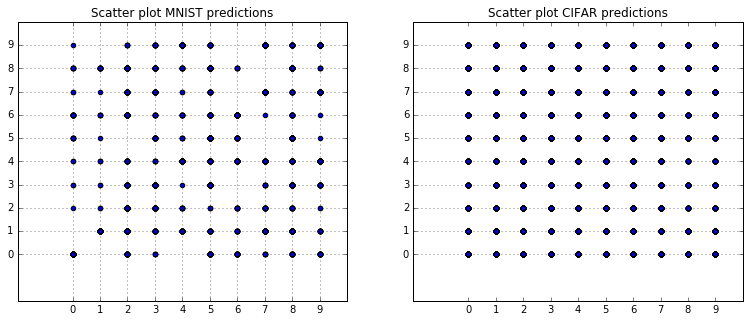

In [30]:
# Distribution of labels in MNIST
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].scatter(mnist_y_test, expected_values_num_mnist)
ax[0].set_xticks((np.arange(0,10)))
ax[0].set_yticks((np.arange(0,10)))
ax[0].grid(axis='x', linestyle=':')
ax[0].grid(axis='y', linestyle=':')
ax[0].set_title("Scatter plot MNIST predictions")

ax[1].scatter(cifar_y_test, expected_values_num_cifar)
ax[1].set_xticks((np.arange(0,10)))
ax[1].set_yticks((np.arange(0,10)))
ax[0].grid(axis='x', linestyle=':')
ax[1].grid(axis='y', linestyle=':')
ax[1].set_title("Scatter plot CIFAR predictions")
plt.show()

Computing the mean squared error...

In [31]:
MSE_mnist = 1 / len(mnist_y_test) * np.linalg.norm(mnist_y_test - expected_values_num_mnist)**2
print(MSE_mnist)

MSE_cifar = 1 / len(cifar_y_test) * np.linalg.norm(cifar_y_test - expected_values_num_cifar)**2
print(MSE_cifar)

2.4295
12.7056


<div class="alert alert-info">
<h3>Comment</h3>
We can see that our predictions cover a wide range (for CIFAR any kind of confusion is possible, for MNIST there are some gaps). We will observe the exact accuracies and prediction confusions in the next step. The MSE value tells us that on average we are sqrt(2.4) away from the true label for MNIST and sqrt(12.7) for CIFAR. Therefore, we already know that the regression model worked much better on MNIST than on CIFAR.
</div>

### d) Discretization, Confusion Matrix and Precision

Discretizing the predictions was quite simple in our case. Since we use one-hot encoded labels, we simply take the "argmax" of our predictions to obtain a discrete prediction label. If we had run the regression against the original labels, the discretization step could be more complex because then we would have had to quantize the predicted labels in some way (e.g. round them).

In [32]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


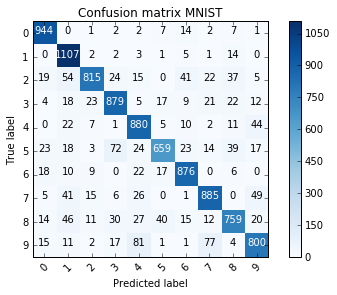

In [33]:
from sklearn.metrics import confusion_matrix

cnf_matrix_mnist = confusion_matrix(mnist_y_test, expected_values_num_mnist, labels=np.arange(10))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_mnist, classes=np.arange(10),
                      title='Confusion matrix MNIST')

plt.show()

Confusion matrix, without normalization


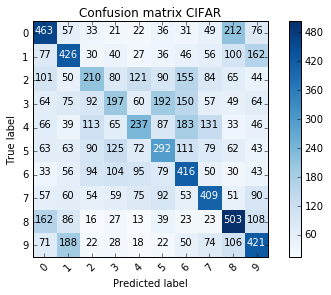

In [34]:
cnf_matrix_cifar = confusion_matrix(cifar_y_test, expected_values_num_cifar, labels=np.arange(10))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_cifar, classes=np.arange(10),
                      title='Confusion matrix CIFAR')

plt.show()

In [35]:
print('Accuracy MNIST: ', np.sum(expected_values_num_mnist == mnist_y_test) / len(mnist_y_test))
print('Accuracy CIFAR: ', np.sum(expected_values_num_cifar == cifar_y_test) / len(cifar_y_test))

Accuracy MNIST:  0.8604
Accuracy CIFAR:  0.3574


<div class="alert alert-info">
<h3>Comment</h3>
<p>We achieve an accuracy of around 86% on MNIST meaning that 86% of our predictions are correct with the regression model that we implemented. A random guess would achieve 10% accuracy. For CIFAR we only achieve 36%.</p>

<p>MLE and the Bayesian approach lead to the same result meaning that for a large number of samples the expected prediction is equal to the MLE prediction. This is logical since the posterior distribution for W becomes more and more certain the more training samples we have (the variances for the W values decrease). Taking expected values gets closer to the actual value which also happens with the MLE estimator when adding more data.</p>
</div>

### e) Regression performance w.r.t. classification performance

<div class="alert alert-info">
<h3>Comment</h3>
Applying regression to classification tasks seems to work quite well (at least on MNIST) given that we apply the right preprocessing to the data (one-hot encoding of the training labels in our case). If we do not apply this preprocessing the results get a lot worse. Running a regression directly against categorical labels implies that we assume a linear relationship between the spatial values of the images and the categorical labels. However, this leads to a lot of confusions. <p>Example:</p>
<p>- The number 9 pushes weights of the pixels along its contours up, so that filled pixels along them increase the linear output towards the value of 9.</p>
<p>- At the same time the number 2 may share a lot of overlapping pixels with number 9 (depending on the handwritten digit we look at of course), which would push the weights in the opposite direction for those pixels.</p>
<p>- Therefore, it is hard to come up with a good set of weights that produces the desired output.</p>

<p>Assuming however, that we carry out the correct preprocessing of the training data, we see that regression algorithms can sometimes compete with classification algorithms. The performance is similar to the one of naive Bayes in the MNIST case.</p>
<p>For the CIFAR dataset things have not worked out so well. The regression worked to some extend (36% accuracy is definitely better than a random guess 10%) but there is still a lot of space for improvement.</p>
</div>

### f) Limitation of using regression for the classification task

<div class="alert alert-info">
<h3>Comment</h3>
One limitation of the linear regression is the linear relationship that we assume between the input and the target labels. We have to assign a fixed weight to each pixel (plus an additional bias term). We could think of more flexible models like neural networks that only take certain combinations of pixels into account if they exceed a threshold value. These can even be extended to convolutional neural networks that take patterns inside images into account. Here the linear regression is clearly inferior because it does not produce translation or scale-invariant results. Shrinking the digit on an MNIST picture would make the trained regression model useless. Moreover, the linear regression does not take any care of structure in the data (which is important for image analysis). Shuffling the pixels and retraining the models would simply result in shuffled weights. For CIFAR we clearly need to incorporate the structure of the images into our model. Convolutional neural networks are known to work quite well.
</div>

# 5. Bonus Question 

Our solution to the bonus question is to apply linear regression on the convolutional output of LeNet5. In order to train this CNN we use the keras Python library which makes it very easy to train neural networks and alter the architecture afterwards.
<p>As a first step we define the network architecture.</p>

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
K.set_image_dim_ordering('th')
 
class LeNet:
    @staticmethod
    def build(width, height, depth, classes, weightsPath=None):
        # initialize the model
        model = Sequential()
        # first set of CONV => RELU => POOL
        model.add(Conv2D(6, (5, 5), padding="same",
            input_shape=(depth, height, width)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL
        model.add(Conv2D(16, (5, 5), padding="valid"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))
        # second set of FC => RELU layers
        model.add(Dense(84))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # if a weights path is supplied (inicating that the model was
        # pre-trained), then load the weights
        if weightsPath is not None:
            model.load_weights(weightsPath)

        # return the constructed network architecture
        return model

Using TensorFlow backend.


We then preprocess the MNIST input to make it compatible with the neural network.

In [5]:
training_features = np.array([feature / 255.0 for feature in mnist_X_train])
training_features = training_features[:, np.newaxis, :, :]
test_features = np.array([feature / 255.0 for feature in mnist_X_test])
test_features = test_features[:, np.newaxis, :, :]
training_labels = preprocess_labels(mnist_y_train)
test_labels = preprocess_labels(mnist_y_test)

In the next step we train the model...

In [68]:
from keras.optimizers import SGD
from keras.optimizers import Adam

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=0.01)
weights_path = 'lenet_weights'
model = LeNet.build(width=28, height=28, depth=1, classes=10, weightsPath=weights_path)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# only train and evaluate the model if we *are not* loading a
# pre-existing model
if weights_path == None:
    print("[INFO] training...")
    model.fit(training_features, training_labels, batch_size=128, epochs=20,
        verbose=1)
 
    # show the accuracy on the testing set
    print("[INFO] evaluating...")
    (loss, accuracy) = model.evaluate(test_features, test_labels,
        batch_size=128, verbose=1)
    print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))
    
    model.save_weights('lenet_weights', overwrite=True)
    
print("[INFO] loaded model.")

[INFO] compiling model...
[INFO] loaded model.


and evaluate...

In [17]:
probs = model.predict(test_features)
predictions = probs.argmax(axis=1)
print(np.sum(predictions == mnist_y_test) / len(mnist_y_test))

0.9847


<div class="alert alert-info">
<h3>Comment</h3>
Using the LeNet 5 architecture, we achieve 98.47% accuracy after only 20 epochs of training.
</div>

### Alter the LeNet model to only keep the output of the convolutional layers

Our approach is to use the trained LeNet5 model and to remove the dense layers. This way we can obtain the output of the convolutions for each training and test feature with a set of pretrained convolutional filters. The output of the filters contains structural information about the image that will automatically be used by our regression model that we apply on top of this output.

In [69]:
# popping 6 layers leaves us just with the output of the flatten layer after the convolutions
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.layers.pop()
model.outputs = [model.layers[-1].output]
model.layers[-1].outbound_nodes = []
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [70]:
convolutional_features_training = model.predict(training_features)
convolutional_features_test = model.predict(test_features)

### Run linear regression on the newly extracted features

In [71]:
convolutional_features_training = preprocess_inputs(convolutional_features_training, noise_strength=0.01)
convolutional_features_test = preprocess_inputs(convolutional_features_test, noise_strength=0.01)

In [72]:
w_hat, ss_hat = obtain_mle_estimates(convolutional_features, training_labels)

In [73]:
mu_w, sigma_w = obtain_bayesian_posterior(convolutional_features, training_labels, ss_hat)

In [74]:
expected_values = np.dot(convolutional_features_test, mu_w)
predictions = np.argmax(expected_values, axis=1)

In [76]:
print('Accuracy CNN-regression:', np.sum(predictions == mnist_y_test) / len(mnist_y_test))

Accuracy CNN-regression: 0.9726


<div class="alert alert-info">
<h3>Comment</h3>
Preprocessing the images with convolutional filters highers our regression model accuracy substantially. We now achieve 97.26% which is almost as good as LeNet5.
</div>

# 3. Classification 
## 3.1 Naive Bayes classifier

In [ ]:
def priorGen (X):
    prior = np.array()
    total = 0  
    for class_n, images in data.items():
        priors[class_n] = len(images)
        total += len(images)
    for class_n in priors:
        priors[class_n] = priors[class_n]/total
    return priors

def generateGaussians(data):
    gaussians = dict()
    for c, items in data.items():
        gaussians[c] = {
            'mean': np.mean(items, axis=0),
            'var': np.var(items, axis=0),
        }
    return gaussians